In [59]:
### Import packages
import numpy as np 
# data processing
import pandas as pd 
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import missingno as msno

In [2]:
data=pd.read_csv("GESIS_data.csv", delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Columns: 137 entries, za_number to hzzr019a
dtypes: int64(134), object(3)
memory usage: 3.9+ MB


In [3]:
data.shape

(3765, 137)

In [4]:
data.columns

Index(['za_number', 'version', 'doi', 'id', 'cohort', 'sex', 'age_cat',
       'education_cat', 'intention_to_vote', 'choice_of_party',
       ...
       'hzzr010a', 'hzzr011a', 'hzzr012a', 'hzzr013a', 'hzzr014a', 'hzzr015a',
       'hzzr016a', 'hzzr017a', 'hzzr018a', 'hzzr019a'],
      dtype='object', length=137)

In [5]:
### Method chaining -removing the unnecessary columns: non-informative features, supplementary material and sub-items
data=data\
    .drop(data.loc[:, 'za_number':'cohort'].columns, axis = 1)\
    .drop(data.loc[:, 'hzza001a':'hzzr019a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy054a':'hzcy084a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy096a':'hzcy099a'].columns, axis = 1)
print(data.columns)

Index(['sex', 'age_cat', 'education_cat', 'intention_to_vote',
       'choice_of_party', 'political_orientation', 'marstat', 'household',
       'hzcy001a', 'hzcy002a', 'hzcy003a', 'hzcy004a', 'hzcy005a', 'hzcy006a',
       'hzcy007a', 'hzcy008a', 'hzcy009a', 'hzcy010a', 'hzcy011a', 'hzcy012a',
       'hzcy013a', 'hzcy014a', 'hzcy015a', 'hzcy016a', 'hzcy018a', 'hzcy019a',
       'hzcy020a', 'hzcy021a', 'hzcy022a', 'hzcy023a', 'hzcy024a', 'hzcy025a',
       'hzcy026a', 'hzcy027a', 'hzcy028a', 'hzcy029a', 'hzcy030a', 'hzcy031a',
       'hzcy032a', 'hzcy033a', 'hzcy034a', 'hzcy035a', 'hzcy036a', 'hzcy037a',
       'hzcy038a', 'hzcy039a', 'hzcy040a', 'hzcy041a', 'hzcy042a', 'hzcy043a',
       'hzcy044a', 'hzcy045a', 'hzcy046a', 'hzcy047a', 'hzcy048a', 'hzcy049a',
       'hzcy050a', 'hzcy051a', 'hzcy052a', 'hzcy053a', 'hzcy085a', 'hzcy086a',
       'hzcy087a', 'hzcy088a', 'hzcy089a', 'hzcy090a', 'hzcy091a', 'hzcy092a',
       'hzcy093a', 'hzcy095a'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   sex                    3765 non-null   int64
 1   age_cat                3765 non-null   int64
 2   education_cat          3765 non-null   int64
 3   intention_to_vote      3765 non-null   int64
 4   choice_of_party        3765 non-null   int64
 5   political_orientation  3765 non-null   int64
 6   marstat                3765 non-null   int64
 7   household              3765 non-null   int64
 8   hzcy001a               3765 non-null   int64
 9   hzcy002a               3765 non-null   int64
 10  hzcy003a               3765 non-null   int64
 11  hzcy004a               3765 non-null   int64
 12  hzcy005a               3765 non-null   int64
 13  hzcy006a               3765 non-null   int64
 14  hzcy007a               3765 non-null   int64
 15  hzcy008a               3765 non-null  

In [7]:
### Defining missing values
list_na=(-22,-33,-77,-88,-99,-111) 
data = data.replace({list_na:np.nan}) 

In [8]:
data.isna().sum()/len(data)

sex                  0.000000
age_cat              0.000000
education_cat        0.000000
intention_to_vote    0.055246
choice_of_party      0.056574
                       ...   
hzcy090a             0.158300
hzcy091a             0.158300
hzcy092a             0.158300
hzcy093a             0.158300
hzcy095a             0.158300
Length: 70, dtype: float64

In [9]:
### dealing with the values 97 and 98
# 97 = not eligible to vote
Crosstab=pd.crosstab(index=data['intention_to_vote'],columns=data['choice_of_party'])
print(Crosstab)

choice_of_party    1.0   2.0   3.0   4.0   5.0   6.0   7.0   97.0  98.0
intention_to_vote                                                      
1.0                   3     3     0     4     4     6     9     1   135
2.0                 738   356   249   283   742   271    73     1   537
97.0                  2     2     1     0     4     2     0    77     4


In [10]:
## subset- dropping the common rows with the value 97
indexNames = data[(data['intention_to_vote'] == 97.0) & (data['choice_of_party'] == 97.0)].index
data.drop(indexNames , inplace=True)

In [11]:
### drop the rest of the rows with the value 97 and recode 98 
data = data.drop(data.index[data['intention_to_vote'] == 97.0])
data = data.drop(data.index[data['choice_of_party'] == 97.0])
data['choice_of_party'] = data['choice_of_party'].replace([98.0],8)

In [12]:
### recode value 97 (97 means 'it has already happened') in four features:
data['hzcy001a'] = data['hzcy001a'].replace([97.0],8)
data['hzcy002a'] = data['hzcy002a'].replace([97.0],8)
data['hzcy004a'] = data['hzcy004a'].replace([97.0],8)
data['hzcy005a'] = data['hzcy005a'].replace([97.0],8)

<AxesSubplot:>

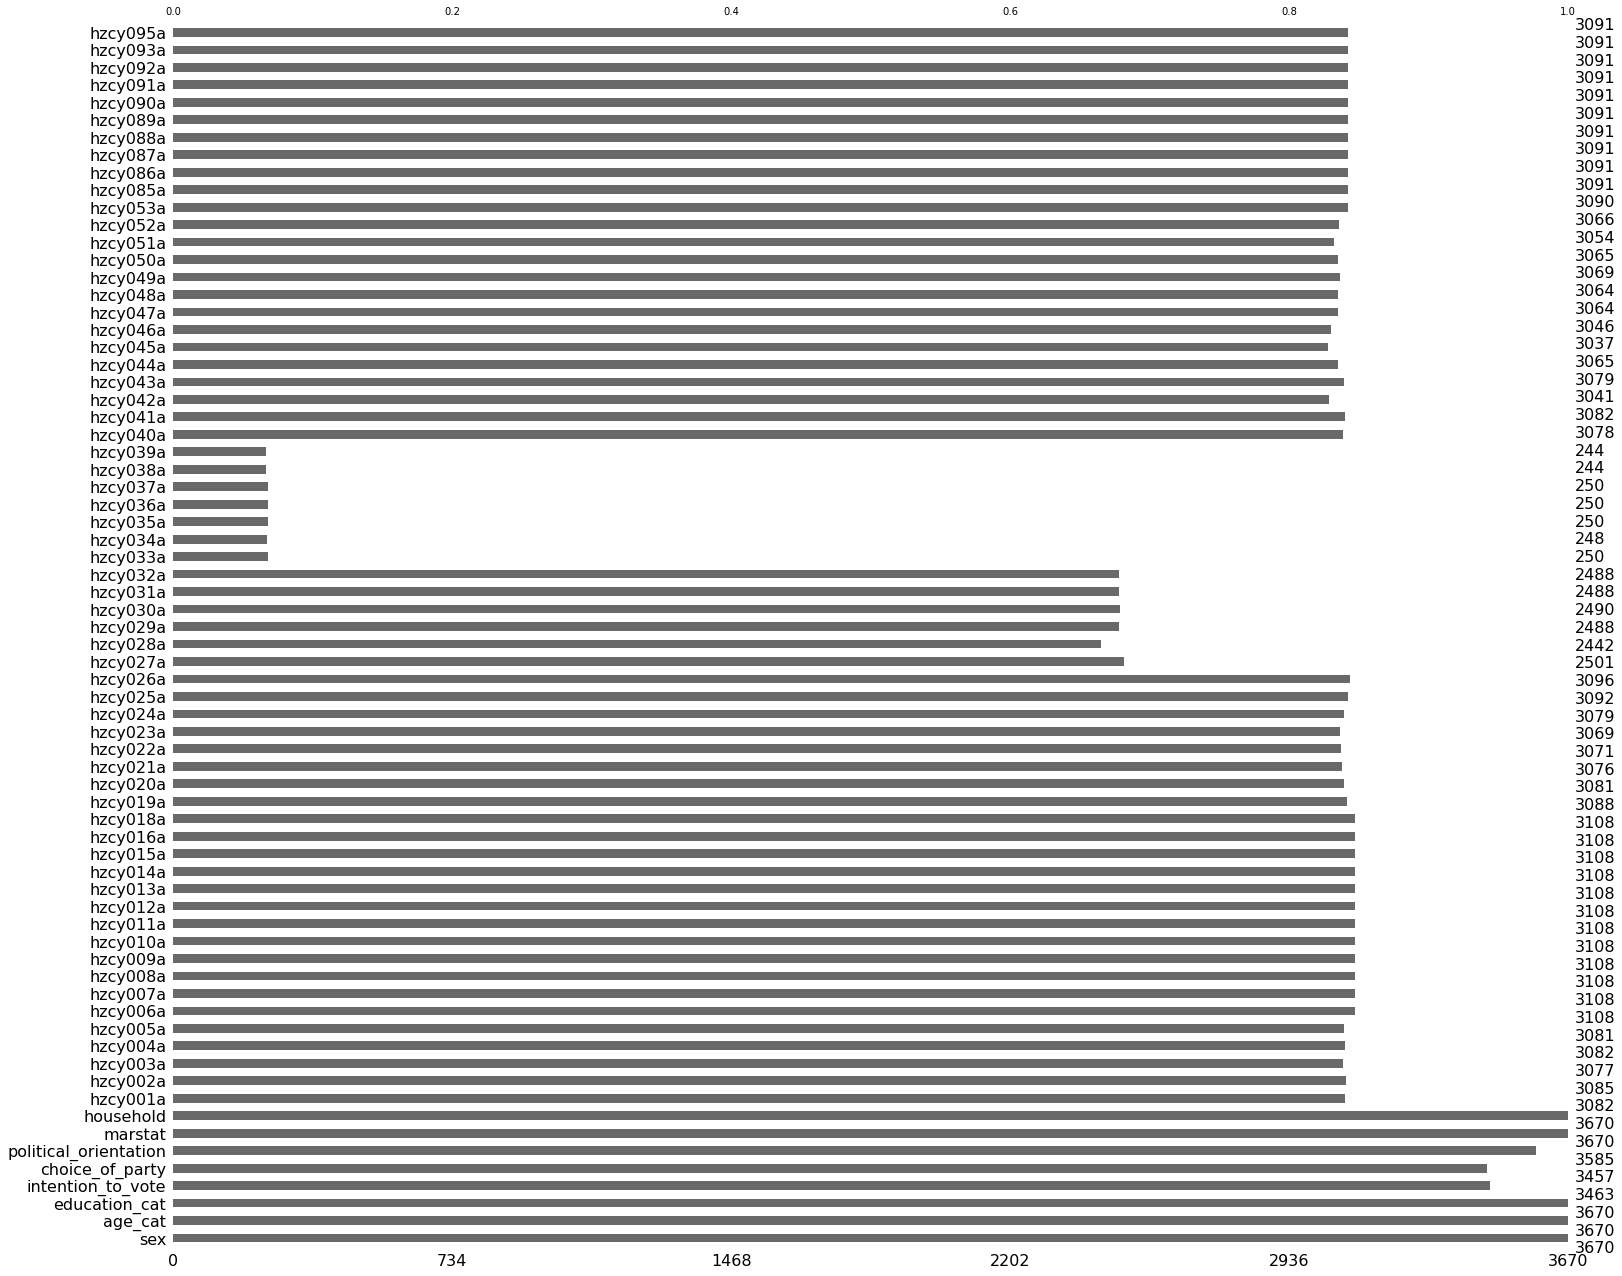

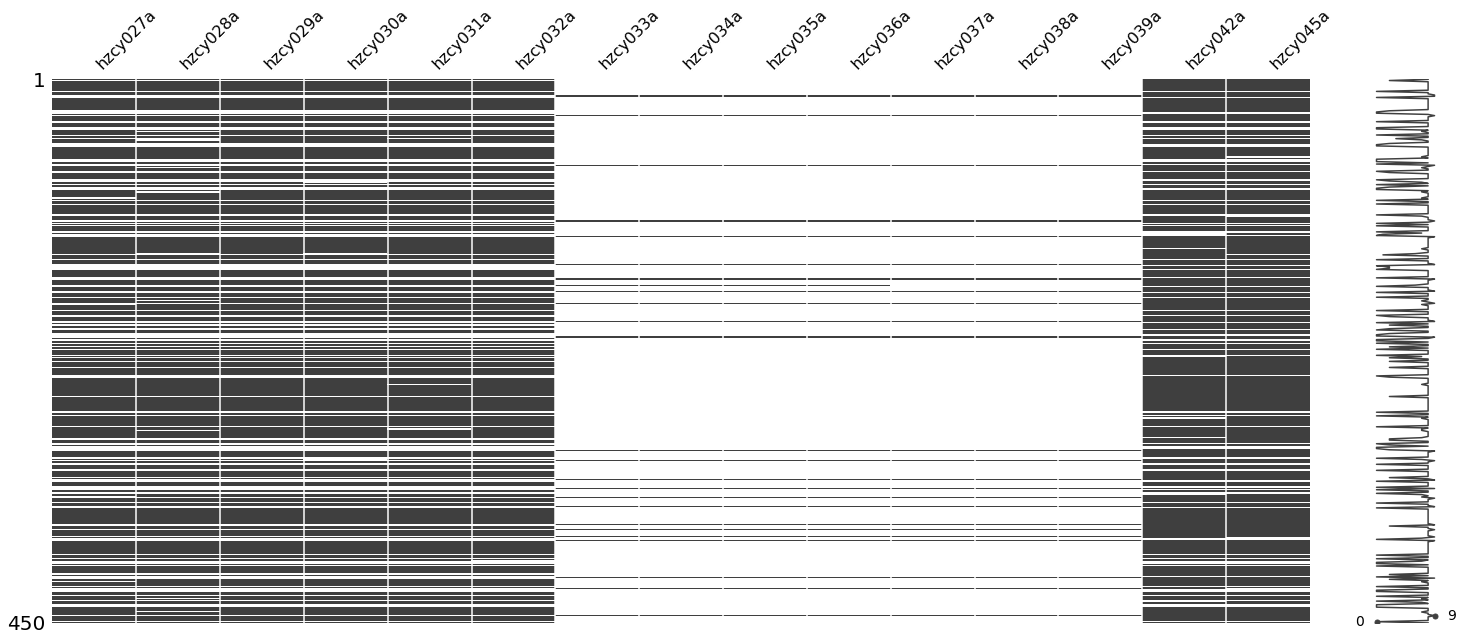

In [13]:
### Examining the missing data
msno.bar(data)
filtered_data = msno.nullity_filter(data, filter='bottom', n=15, p=0.999) # or filter='top'
msno.matrix(filtered_data.sample(450))

In [14]:
### This graph shows that there is a pattern in missing data btw 33a-39a. It is due to unit nonresponse as a result of survey structure. Here the missingness can be defined as 
### Missing Not at Random (MNAR) so these features should be deleted.
data=data.drop(data.loc[:, 'hzcy033a':'hzcy039a'].columns, axis = 1)

<AxesSubplot:>

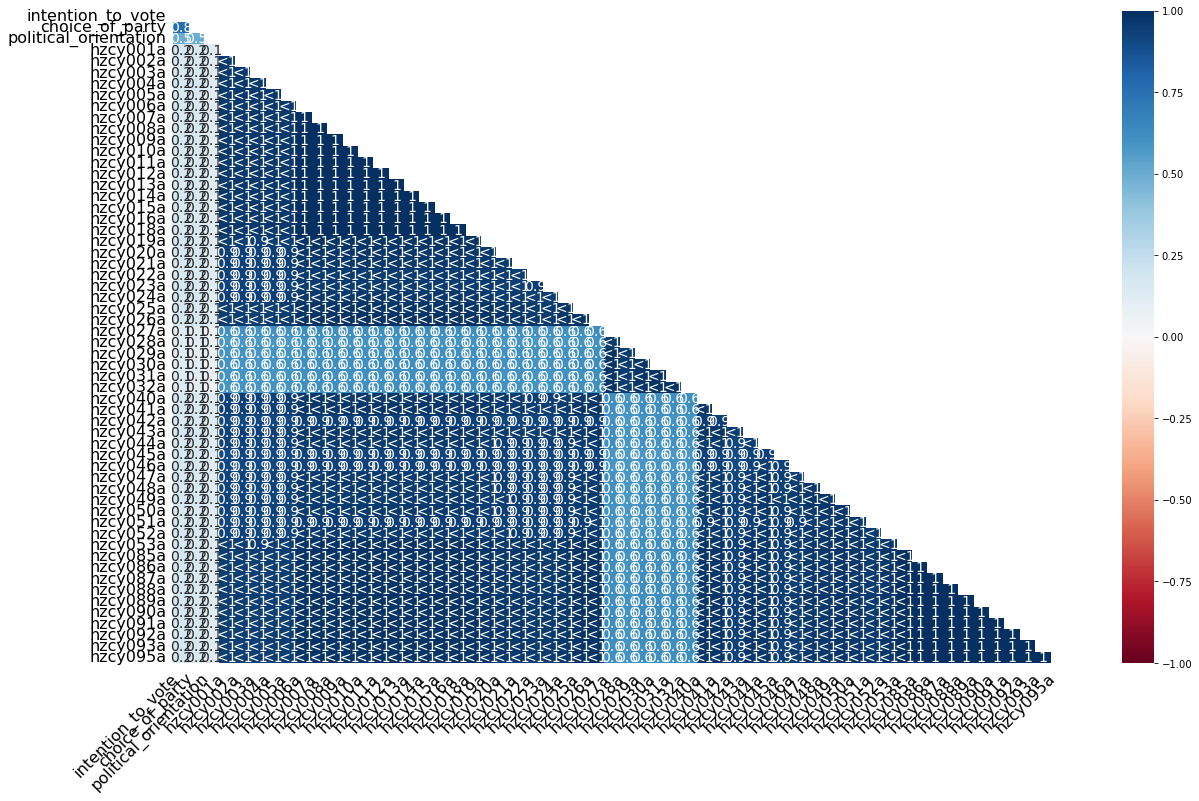

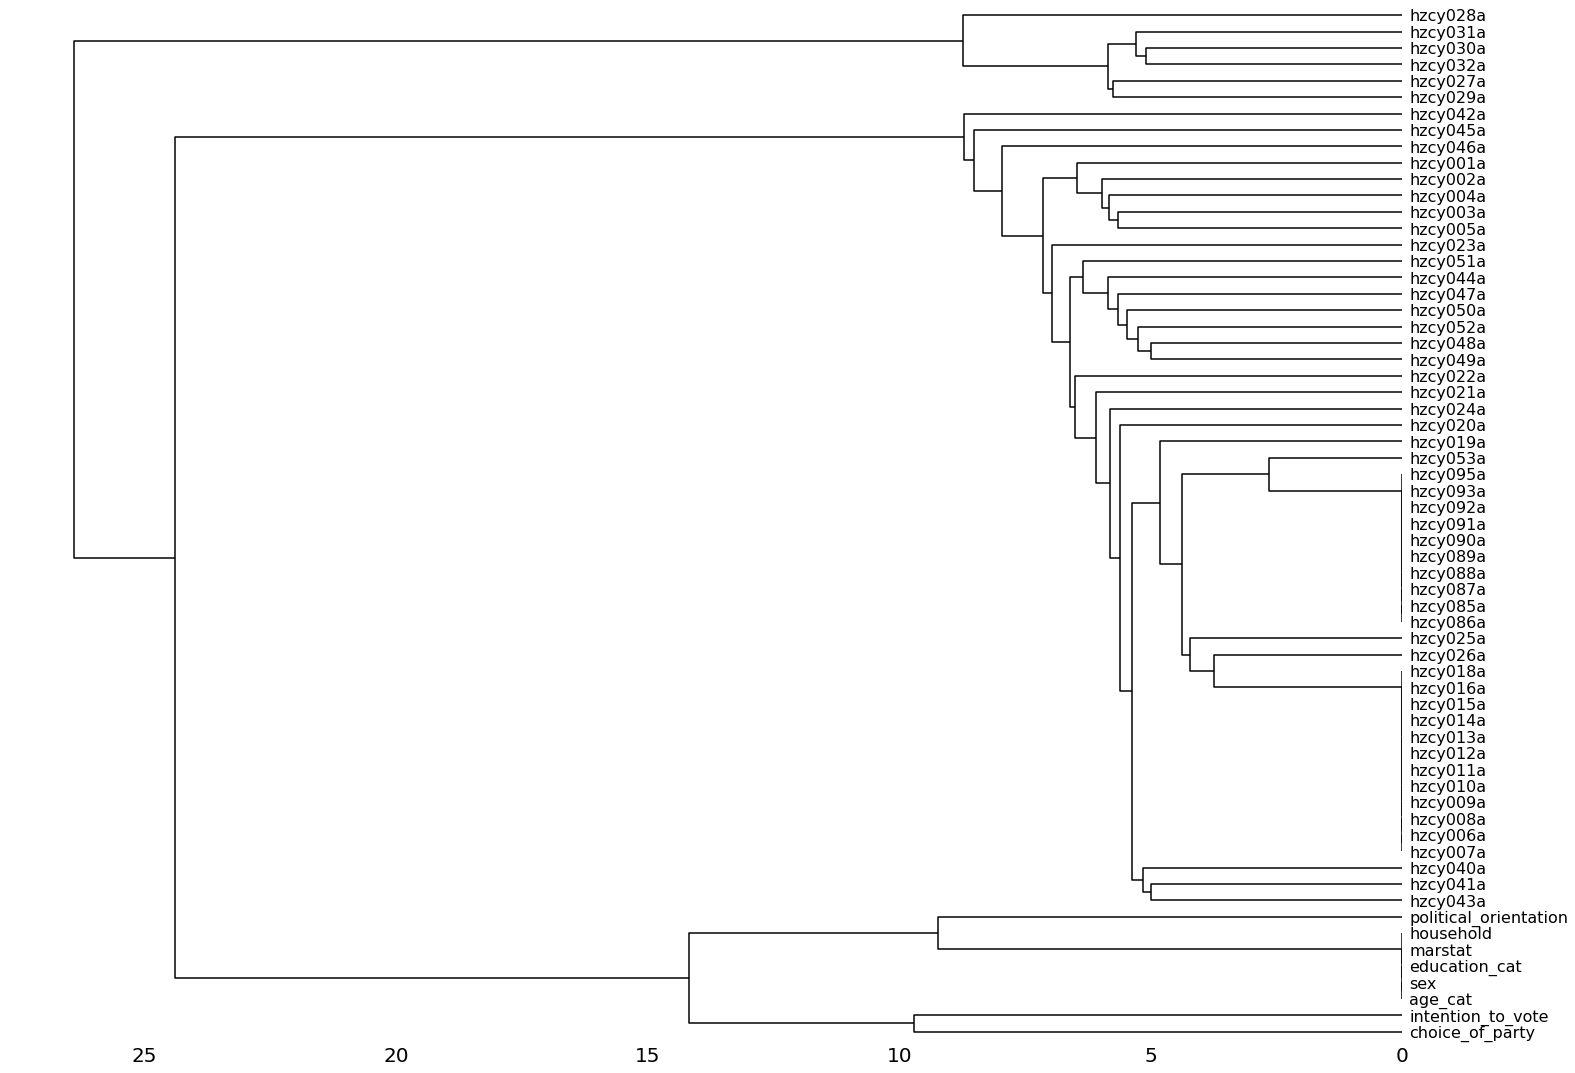

In [15]:
msno.heatmap(data)
### High correlations!
msno.dendrogram(data)

<AxesSubplot:xlabel='hzcy041a', ylabel='hzcy043a'>

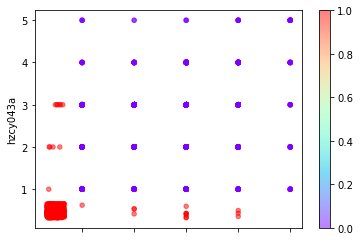

In [16]:
### Let's visualize how missingness of a variable changes against another variable
from numpy.random import rand
def fill_dummy_values(data, scaling_factor):
    data_dummy=data.copy(deep=True)
    for col in data_dummy:
        col = data_dummy[col]
        col_null = col.isnull()
        num_nulls = col_null.sum()
        col_range = col.max() - col.min()
        dummy_values= (rand(num_nulls) - 2)
        dummy_values = dummy_values * scaling_factor * col_range + col.min()
        col[col_null] = dummy_values
    return data_dummy

data_dum = fill_dummy_values(data, 0.085)
nullitydata=data.hzcy041a.isnull()+data.hzcy043a.isnull()
data_dum.plot(x='hzcy041a', y='hzcy043a', kind='scatter', alpha=0.5, c=nullitydata, cmap='rainbow')

In [17]:
# NEXT STEP: Choosing one feature per unit for the analysis
## hzcy001a:hzcy005a is about probability of corona infection.
data.hzcy001a.value_counts()
# hzcy006a:hzcy018a measures & actions taken
### hzcy008a is included: I have adapted my school or work situation(measures taken against corona)
data.hzcy008a.value_counts()
# hzcy019a:hzcy025a effectiveness of measures
# hzcy025a is selected: Curfew for anyone not working in the health sector or other critical
# professions is an effective policy in fighting the further spread of the coronavirus.
data.hzcy025a.value_counts()
### hzcy026a curfew:compliance or refusal
data.hzcy026a.value_counts()
### hzcy027a-hzcy032a: conpliance with curfew
#hzcy028a is selected_ compliance with curfew_fear of punishment
data.hzcy028a.value_counts()
### hzcy040a-hzcy043a: effectiveness of government action
#hzcy042a is selected_ reduction of economic change
data.hzcy042a.value_counts()
### hzcy044a-hzcy052a: trust
#hzcy048a is selected - trust in federal government
data.hzcy048a.value_counts()
### hzcy053a - employment status
data.hzcy053a.value_counts()
### hzcy084a-hzcy095a: media consumption on corona
#hzcy085a (national Tv or radio), 89a(local newspapers) and 92a(personal conversations) are selected
data.hzcy085a.value_counts()

0.0    1881
1.0    1210
Name: hzcy085a, dtype: int64

In [18]:
### SUBSET DATA with the relevant variables
data=data\
    .drop(data.loc[:, 'hzcy002a':'hzcy007a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy009a':'hzcy024a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy029a':'hzcy041a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy043a':'hzcy047a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy049a':'hzcy052a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy086a':'hzcy088a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy090a':'hzcy091a'].columns, axis = 1)\
    .drop(data.loc[:, 'hzcy093a':'hzcy095a'].columns, axis = 1)\
    .drop('hzcy027a', axis=1)
data.rename(columns={'hzcy001a':'prob_gettinginfected','hzcy008a':'measures_adaptedwork','hzcy025a':'curfew_effective','hzcy026a':'curfew_compliance','hzcy028a':'curfew_punish','hzcy042a':'gov_effect_econ','hzcy048a':'trust_fedgov','hzcy053a':'empl_status','hzcy085a':'sourceinfo_tradmedia','hzcy089a':'sourceinfo_localnewsp','hzcy092a':'sourceinfo_personal'}, inplace=True)
data.columns

Index(['sex', 'age_cat', 'education_cat', 'intention_to_vote',
       'choice_of_party', 'political_orientation', 'marstat', 'household',
       'prob_gettinginfected', 'measures_adaptedwork', 'curfew_effective',
       'curfew_compliance', 'curfew_punish', 'gov_effect_econ', 'trust_fedgov',
       'empl_status', 'sourceinfo_tradmedia', 'sourceinfo_localnewsp',
       'sourceinfo_personal'],
      dtype='object')

In [19]:
### droping the value 98 due to low number of records
data = data.drop(data.index[data['trust_fedgov'] == 98.0])
data = data.drop(data.index[data['trust_fedgov'] == 97.0])
data = data.drop(data.index[data['prob_gettinginfected'] == 8])

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3764
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    3654 non-null   float64
 1   age_cat                3654 non-null   float64
 2   education_cat          3654 non-null   float64
 3   intention_to_vote      3448 non-null   float64
 4   choice_of_party        3442 non-null   float64
 5   political_orientation  3570 non-null   float64
 6   marstat                3654 non-null   float64
 7   household              3654 non-null   float64
 8   prob_gettinginfected   3066 non-null   float64
 9   measures_adaptedwork   3092 non-null   float64
 10  curfew_effective       3077 non-null   float64
 11  curfew_compliance      3080 non-null   float64
 12  curfew_punish          2431 non-null   float64
 13  gov_effect_econ        3025 non-null   float64
 14  trust_fedgov           3048 non-null   float64
 15  empl

In [21]:
data.sex.value_counts()
###sex: already categorically coded but convert it into 0-1
data['sex'] = data['sex'].replace([1],0)
data['sex'] = data['sex'].replace([2],1)
data.sex.value_counts()

0.0    1883
1.0    1771
Name: sex, dtype: int64

In [22]:
## Since the retired group will be accumulated at the one end of the spectrum as well as 
## youth will be on the other side as students, it makes sense to regroup the age_category in consideration with the group sizes.
## Since the retired group will be accumulated at the one end of the spectrum as well as 
## youth will be on the other side as students, it makes sense to regroup the age_category in consideration with the group sizes.
# Group 1: age 25-35
# Grop 2: age 36-45
# Group 3: age 46-60
# Group 4: age 61+
data['age_cat'] = data['age_cat'].replace([2],1)
data['age_cat'] = data['age_cat'].replace([3],1)
data['age_cat'] = data['age_cat'].replace([4],2)
data['age_cat'] = data['age_cat'].replace([5],2)
data['age_cat'] = data['age_cat'].replace([6],3)
data['age_cat'] = data['age_cat'].replace([7],3)
data['age_cat'] = data['age_cat'].replace([8],4)
data['age_cat'] = data['age_cat'].replace([9],4)
data['age_cat'] = data['age_cat'].replace([10],4)
data.age_cat.value_counts()

3.0    1304
4.0    1098
1.0     639
2.0     613
Name: age_cat, dtype: int64

In [23]:
## marital status: married or not
data['marstat'] = data['marstat'].replace([3],2)
data['marstat'] = data['marstat'].replace([4],2)
data.marstat.value_counts()
data['marstat'] = data['marstat'].replace([1],0)
data['marstat'] = data['marstat'].replace([2],1)

In [24]:
### recode curfew effective
## 0: disagree, 1:party agree, 2:agree
data['curfew_effective'] = data['curfew_effective'].replace([1],0)
data['curfew_effective'] = data['curfew_effective'].replace([2],0)
data['curfew_effective'] = data['curfew_effective'].replace([3],1)
data['curfew_effective'] = data['curfew_effective'].replace([4],2)
data['curfew_effective'] = data['curfew_effective'].replace([5],2)
data.curfew_effective.value_counts()

2.0    1770
1.0     860
0.0     447
Name: curfew_effective, dtype: int64

In [25]:
### recode curfew fear of punishment
## 0: disagree, 1:party agree, 2:agree
data['curfew_punish'] = data['curfew_punish'].replace([1],0)
data['curfew_punish'] = data['curfew_punish'].replace([2],0)
data['curfew_punish'] = data['curfew_punish'].replace([3],1)
data['curfew_punish'] = data['curfew_punish'].replace([4],1)
data['curfew_punish'] = data['curfew_punish'].replace([5],1)
data.curfew_punish.value_counts()

0.0    1556
1.0     875
Name: curfew_punish, dtype: int64

In [26]:
data.gov_effect_econ.value_counts()
### recode effectiveness government action: reduction of economic damage
## 0: disagree, 1:party agree, 2:agree
data['gov_effect_econ'] = data['gov_effect_econ'].replace([1],0)
data['gov_effect_econ'] = data['gov_effect_econ'].replace([2],0)
data['gov_effect_econ'] = data['gov_effect_econ'].replace([3],1)
data['gov_effect_econ'] = data['gov_effect_econ'].replace([4],2)
data['gov_effect_econ'] = data['gov_effect_econ'].replace([5],2)
data.gov_effect_econ.value_counts()

1.0    1510
0.0    1342
2.0     173
Name: gov_effect_econ, dtype: int64

In [27]:
data.trust_fedgov.value_counts()
### recode trust in the federal government
## 0: no trust, 1:neither nor, 2:trust
data['trust_fedgov'] = data['trust_fedgov'].replace([1],0)
data['trust_fedgov'] = data['trust_fedgov'].replace([2],0)
data['trust_fedgov'] = data['trust_fedgov'].replace([3],1)
data['trust_fedgov'] = data['trust_fedgov'].replace([4],2)
data['trust_fedgov'] = data['trust_fedgov'].replace([5],2)
data.trust_fedgov.value_counts()

2.0    2002
1.0     624
0.0     422
Name: trust_fedgov, dtype: int64

In [28]:
data.intention_to_vote.value_counts()
data['intention_to_vote'] = data['intention_to_vote'].replace([1],0)
data['intention_to_vote'] = data['intention_to_vote'].replace([2],1)
data.intention_to_vote.value_counts()

1.0    3262
0.0     186
Name: intention_to_vote, dtype: int64

<AxesSubplot:>

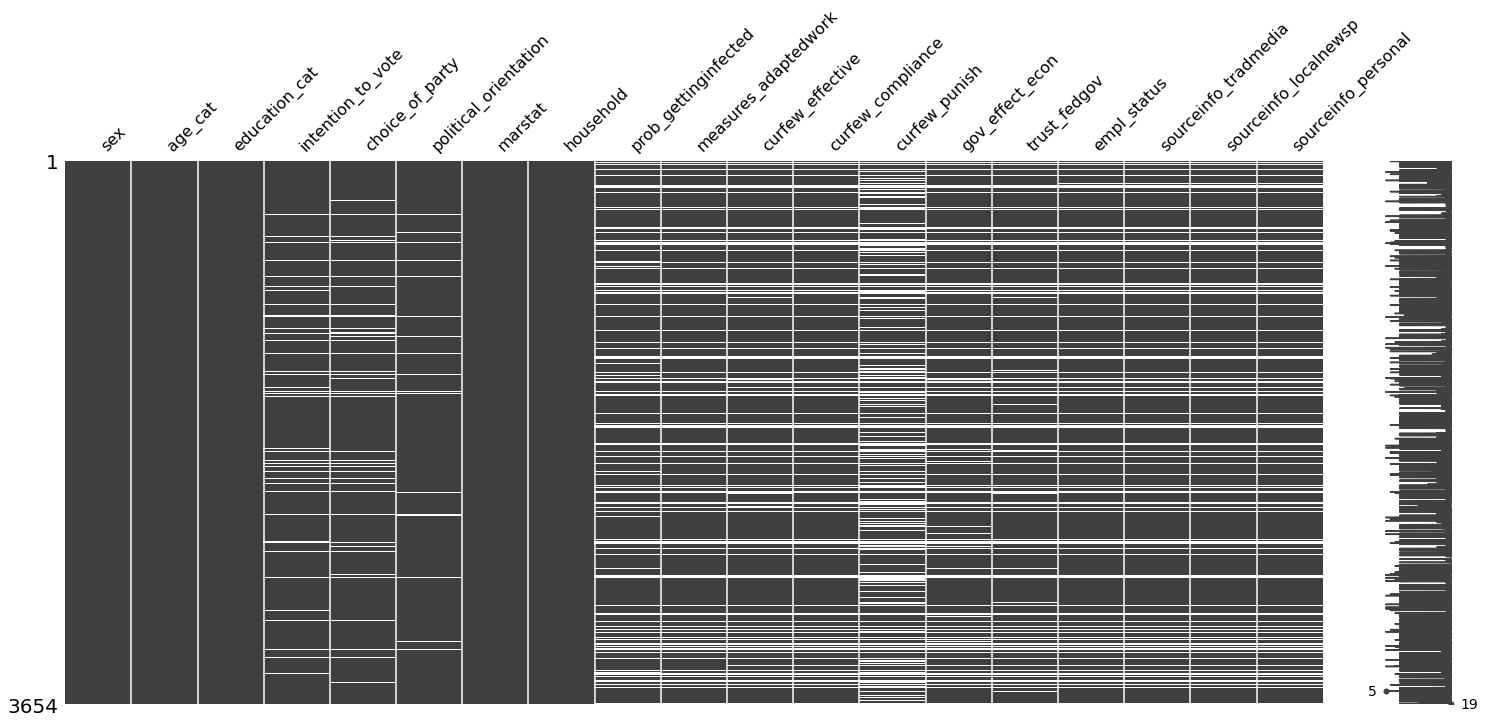

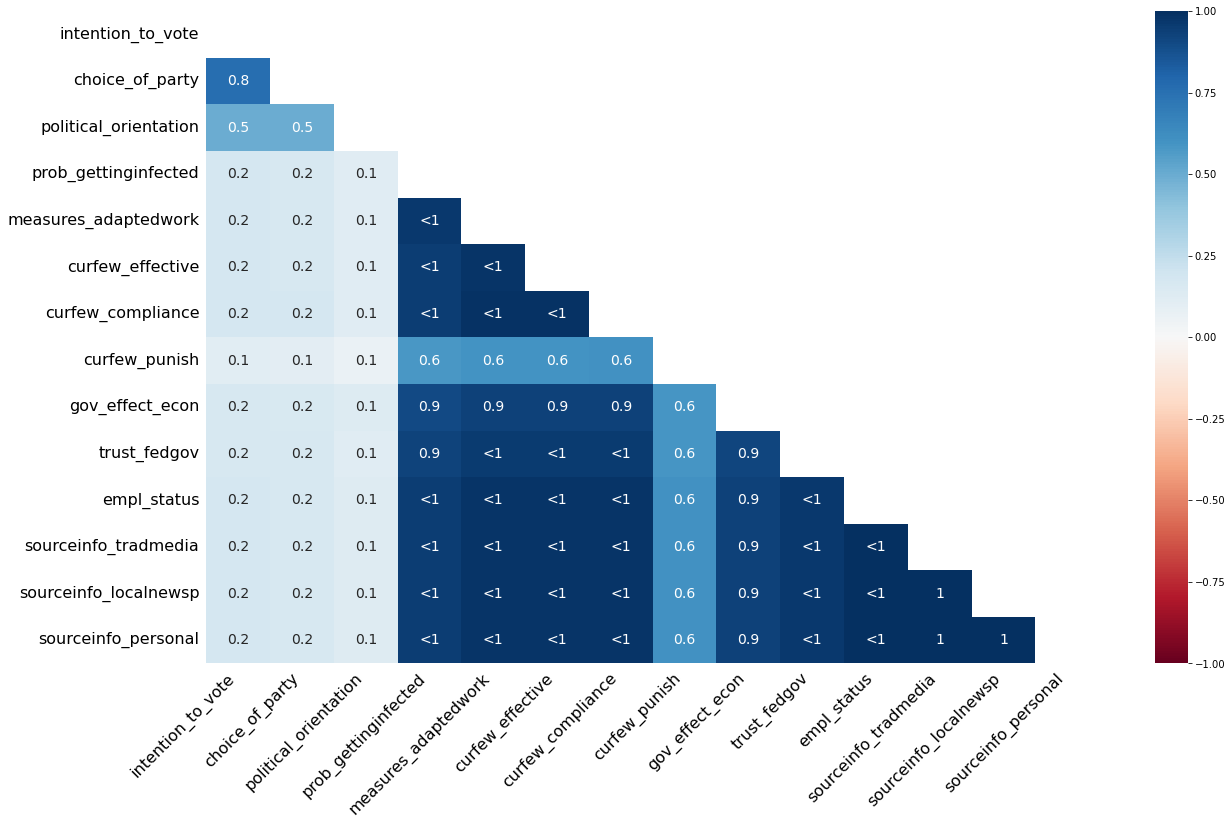

In [29]:
##### MISSING VALUE
msno.matrix(data)
msno.heatmap(data)

In [30]:
# Changing the column order
data=data.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,4]]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3654 entries, 0 to 3764
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sex                    3654 non-null   float64
 1   age_cat                3654 non-null   float64
 2   education_cat          3654 non-null   float64
 3   intention_to_vote      3448 non-null   float64
 4   political_orientation  3570 non-null   float64
 5   marstat                3654 non-null   float64
 6   household              3654 non-null   float64
 7   prob_gettinginfected   3066 non-null   float64
 8   measures_adaptedwork   3092 non-null   float64
 9   curfew_effective       3077 non-null   float64
 10  curfew_compliance      3080 non-null   float64
 11  curfew_punish          2431 non-null   float64
 12  gov_effect_econ        3025 non-null   float64
 13  trust_fedgov           3048 non-null   float64
 14  empl_status            3074 non-null   float64
 15  sour

In [31]:
### MISSING VALUES: ORDINAL ENCODING
from sklearn.preprocessing import OrdinalEncoder
ordinal_enc_dict = {}
# Loop over columns to encode
for col_name in data:
# Create ordinal encoder for the column
    ordinal_enc_dict[col_name] = OrdinalEncoder()
# Select the non-null values in the column
    col = data[col_name]
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
# Encode the non-null values of the column
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
# Replace the values in the column with ordinal values
    data.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [32]:
### IMPUTING WITH KNN
data_KNN_imputed = data.copy(deep=True)
from sklearn.impute import KNNImputer
KNN_imputer=KNNImputer()
data_KNN_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(data))
for col in data_KNN_imputed:
    reshaped_col = data_KNN_imputed[col].values.reshape(-1, 1)
    data_KNN_imputed[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [34]:
### IMPUTING WITH MICE
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
data_mice=data.copy(deep=True)
data_mice.iloc[:,:] = np.round(mice_imputer.fit_transform(data_mice))
for col in data_mice:
    reshaped_col1 = data_mice[col].values.reshape(-1, 1)
    data_mice[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col1)

Text(0.5, 0, 'Employment status')

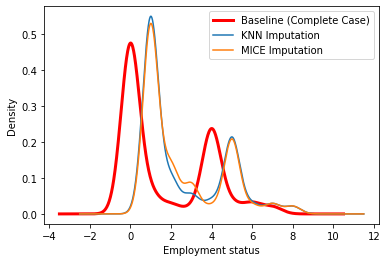

In [40]:
datacc['empl_status'].plot(kind='kde', c='red', linewidth=3)
data_KNN_imputed['empl_status'].plot(kind='kde')
data_mice['empl_status'].plot(kind='kde')
labels = ['Baseline (Complete Case)', 'KNN Imputation','MICE Imputation']
plt.legend(labels)
plt.xlabel('Employment status')

Text(0.5, 0, 'Political Orientation')

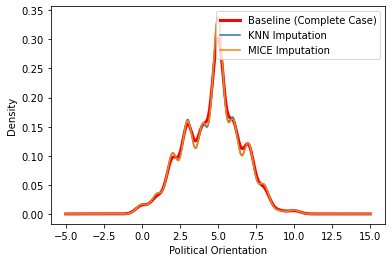

In [41]:
datacc['political_orientation'].plot(kind='kde', c='red', linewidth=3)
data_KNN_imputed['political_orientation'].plot(kind='kde')
data_mice['political_orientation'].plot(kind='kde')
labels = ['Baseline (Complete Case)', 'KNN Imputation','MICE Imputation']
plt.legend(labels)
plt.xlabel('Political Orientation')

Text(0.5, 0, 'Curfew:Fear of Punishment')

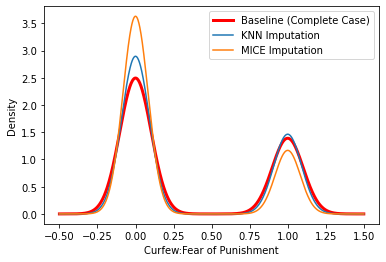

In [42]:
datacc['curfew_punish'].plot(kind='kde', c='red', linewidth=3)
data_KNN_imputed['curfew_punish'].plot(kind='kde')
data_mice['curfew_punish'].plot(kind='kde')
labels = ['Baseline (Complete Case)', 'KNN Imputation','MICE Imputation']
plt.legend(labels)
plt.xlabel('Curfew:Fear of Punishment')

Text(0.5, 0, 'Trust in Federal Government')

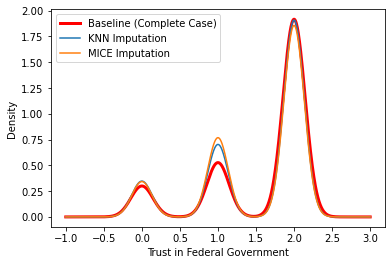

In [43]:
datacc['trust_fedgov'].plot(kind='kde', c='red', linewidth=3)
data_KNN_imputed['trust_fedgov'].plot(kind='kde')
data_mice['trust_fedgov'].plot(kind='kde')
labels = ['Baseline (Complete Case)', 'KNN Imputation','MICE Imputation']
plt.legend(labels)
plt.xlabel('Trust in Federal Government')

In [44]:
data_KNN_imputed.to_pickle("data_knnimputed.pkl")

In [46]:
### NEXT STEP: Correlations and chi-square
### At this point, before moving on with feature engineering, let's check the relationship among categories with Chi Square.
#### CHI SQUARE - CORRELATIONS
from itertools import product
import scipy.stats as ss
cat=('sex','age_cat','education_cat','intention_to_vote','choice_of_party','marstat','household','measures_adaptedwork','curfew_effective','curfew_compliance','curfew_punish','gov_effect_econ','trust_fedgov', 'empl_status','sourceinfo_tradmedia','sourceinfo_localnewsp','sourceinfo_personal')
## Let's jump to Chi-Square test
## Creating all possible combinations between the above two variables list
cat_var_prod = list(product(cat,cat, repeat = 1))
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            data[i[0]], data[i[1]])))[1]))
print(result)

[('sex', 'age_cat', 0.005940786009276395), ('sex', 'education_cat', 1.0626601988709666e-07), ('sex', 'intention_to_vote', 0.01441028060818343), ('sex', 'choice_of_party', 5.312543258460228e-28), ('sex', 'marstat', 0.07471013304666724), ('sex', 'household', 0.9929129139464441), ('sex', 'measures_adaptedwork', 0.11970205170534798), ('sex', 'curfew_effective', 1.3261557751200264e-06), ('sex', 'curfew_compliance', 3.311253282127669e-06), ('sex', 'curfew_punish', 0.005271824965656033), ('sex', 'gov_effect_econ', 1.347754565873216e-07), ('sex', 'trust_fedgov', 0.00044222656634725804), ('sex', 'empl_status', 3.317622911142207e-27), ('sex', 'sourceinfo_tradmedia', 0.07406720761792639), ('sex', 'sourceinfo_localnewsp', 0.7218997032852976), ('sex', 'sourceinfo_personal', 1.084602344058927e-09), ('age_cat', 'sex', 0.005940786009276389), ('age_cat', 'education_cat', 1.5500967608053985e-52), ('age_cat', 'intention_to_vote', 1.0043358772207984e-05), ('age_cat', 'choice_of_party', 3.847911117206819e-

In [47]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
# Using pivot function to convert the above DataFrame into a crosstab
x= chi_test_output.pivot(index='var1',columns='var2', values='coeff')
x.round(decimals=2)

var2,age_cat,choice_of_party,curfew_compliance,curfew_effective,curfew_punish,education_cat,empl_status,gov_effect_econ,household,intention_to_vote,marstat,measures_adaptedwork,sex,sourceinfo_localnewsp,sourceinfo_personal,sourceinfo_tradmedia,trust_fedgov
var1,,,,,,,,,,,,,,,,,
age_cat,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00
choice_of_party,0.00,NaN,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
curfew_compliance,0.00,0.00,NaN,0.00,0.10,0.00,0.00,0.00,0.00,0.31,0.00,0.55,0.00,0.00,0.00,0.00,0.00
curfew_effective,0.00,0.02,0.00,NaN,0.12,0.28,0.00,0.00,0.03,0.77,0.29,0.00,0.00,0.26,0.28,0.00,0.00
curfew_punish,0.00,0.00,0.10,0.12,NaN,0.01,0.00,0.71,0.00,0.17,0.05,0.29,0.01,0.00,0.90,0.05,0.62
education_cat,0.00,0.00,0.00,0.28,0.01,NaN,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00
empl_status,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.01,0.00
gov_effect_econ,0.00,0.00,0.00,0.00,0.71,0.05,0.00,NaN,0.00,0.63,0.00,0.09,0.00,0.01,0.06,0.36,0.00
household,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,NaN,0.04,0.00,0.00,0.99,0.00,0.55,0.33,0.04


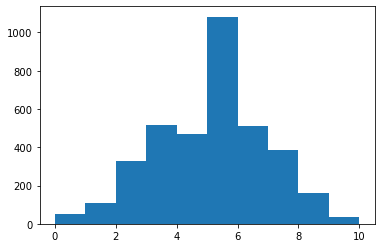

Statistics=0.966, p=0.000
Sample looks Gaussian (reject H0)
-0.10748102795133864


In [48]:
### Distribution & Normality assumptions check for two numerical features: political orientation and probability of getting infected
polint=data['political_orientation']
plt.hist(polint, label='political orientation')
plt.show()
###NORMALITY CHECK:FAILED (H0:normally distributed) but skewness is tolerable!
from scipy.stats import shapiro, skew
stat,p=shapiro(polint)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample looks Gaussian (reject H0)')
print(skew(polint))

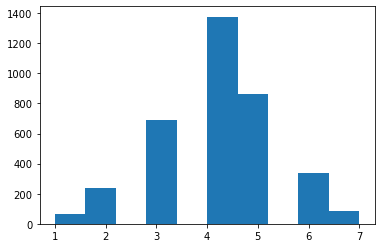

Statistics=0.966, p=0.000
Sample looks Gaussian (reject H0)
-0.05788010715574127


In [49]:
plt.hist(data.prob_gettinginfected, label='political orientation')
plt.show()
stat2,p2=shapiro(data.prob_gettinginfected)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p2 > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample looks Gaussian (reject H0)')
print(skew(data.prob_gettinginfected))

<AxesSubplot:xlabel='choice_of_party', ylabel='political_orientation'>

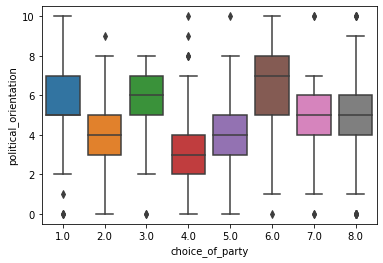

In [50]:
### Outlier detection
sns.boxplot(x="choice_of_party", y="political_orientation", data=data)

Empty DataFrame
Columns: [sex, age_cat, education_cat, intention_to_vote, political_orientation, marstat, household, prob_gettinginfected, measures_adaptedwork, curfew_effective, curfew_compliance, curfew_punish, gov_effect_econ, trust_fedgov, empl_status, sourceinfo_tradmedia, sourceinfo_localnewsp, sourceinfo_personal, choice_of_party]
Index: []


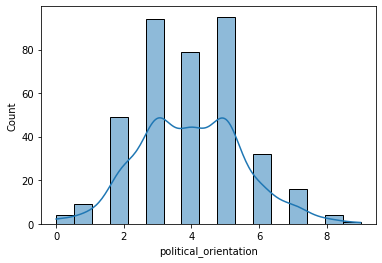

In [51]:
polort = data.loc[data.choice_of_party==2, "political_orientation"]
sns.histplot(polort,kde=True)

threshold_pos = np.mean(polort) + 4 * np.std(polort)
threshold_neg = np.mean(polort) - 4 * np.std(polort)
outlier = data.loc[(data.choice_of_party==1) & (
        (data["political_orientation"]>threshold_pos) | 
        (data["political_orientation"]<threshold_neg) ), :]

print(outlier)

In [52]:
grouped_summary=data[['choice_of_party','political_orientation','empl_status','prob_gettinginfected']]\
.groupby('choice_of_party')\
.median()\
.reset_index()
print(grouped_summary)

   choice_of_party  political_orientation  empl_status  prob_gettinginfected
0              1.0                    5.0          1.0                   4.0
1              2.0                    4.0          2.0                   4.0
2              3.0                    6.0          1.0                   4.0
3              4.0                    3.0          2.0                   4.0
4              5.0                    4.0          1.0                   4.0
5              6.0                    7.0          2.0                   4.0
6              7.0                    5.0          1.0                   4.0
7              8.0                    5.0          1.0                   4.0


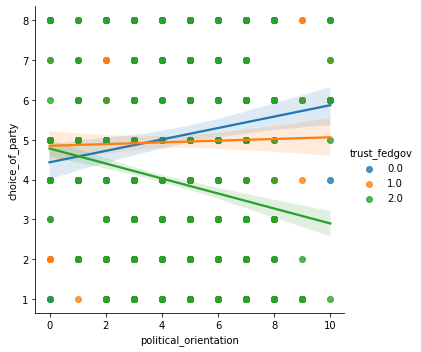

In [54]:
sns.lmplot(x='political_orientation', y='choice_of_party', data=data, hue='trust_fedgov')

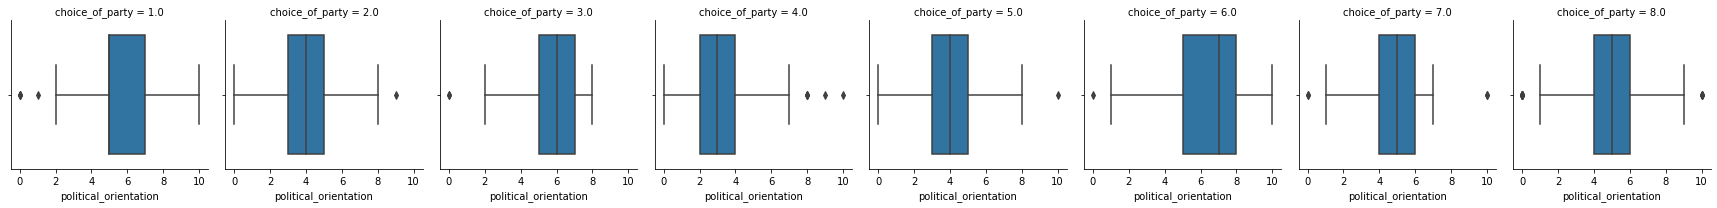

In [55]:
g=sns.FacetGrid(data, col='choice_of_party')
g.map(sns.boxplot, 'political_orientation',order=['1', '2', '3', '4'])

In [56]:
group=data[['choice_of_party','sex','empl_status','age_cat','education_cat','intention_to_vote']]\
.groupby('choice_of_party')\
.median()\
.reset_index()
print(group)

   choice_of_party  sex  empl_status  age_cat  education_cat  \
0              1.0  0.0          1.0      3.0            3.0   
1              2.0  0.0          2.0      3.0            3.0   
2              3.0  0.0          1.0      3.0            3.0   
3              4.0  0.0          2.0      3.0            3.0   
4              5.0  1.0          1.0      3.0            3.0   
5              6.0  0.0          2.0      3.0            2.0   
6              7.0  0.0          1.0      2.0            3.0   
7              8.0  1.0          1.0      3.0            2.0   

   intention_to_vote  
0                1.0  
1                1.0  
2                1.0  
3                1.0  
4                1.0  
5                1.0  
6                1.0  
7                1.0  


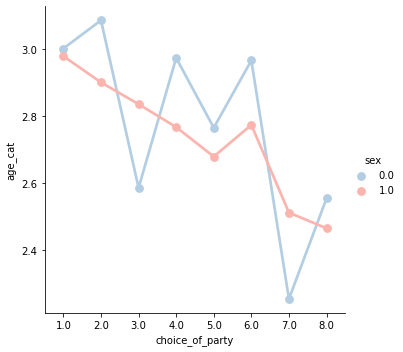

In [57]:
custom_palette=['#B3CDE3','#FBB4AE']
sns.set_palette(custom_palette)
sns.catplot(x='choice_of_party', y='age_cat', data=data, hue='sex', kind='point', ci=None)
plt.show()

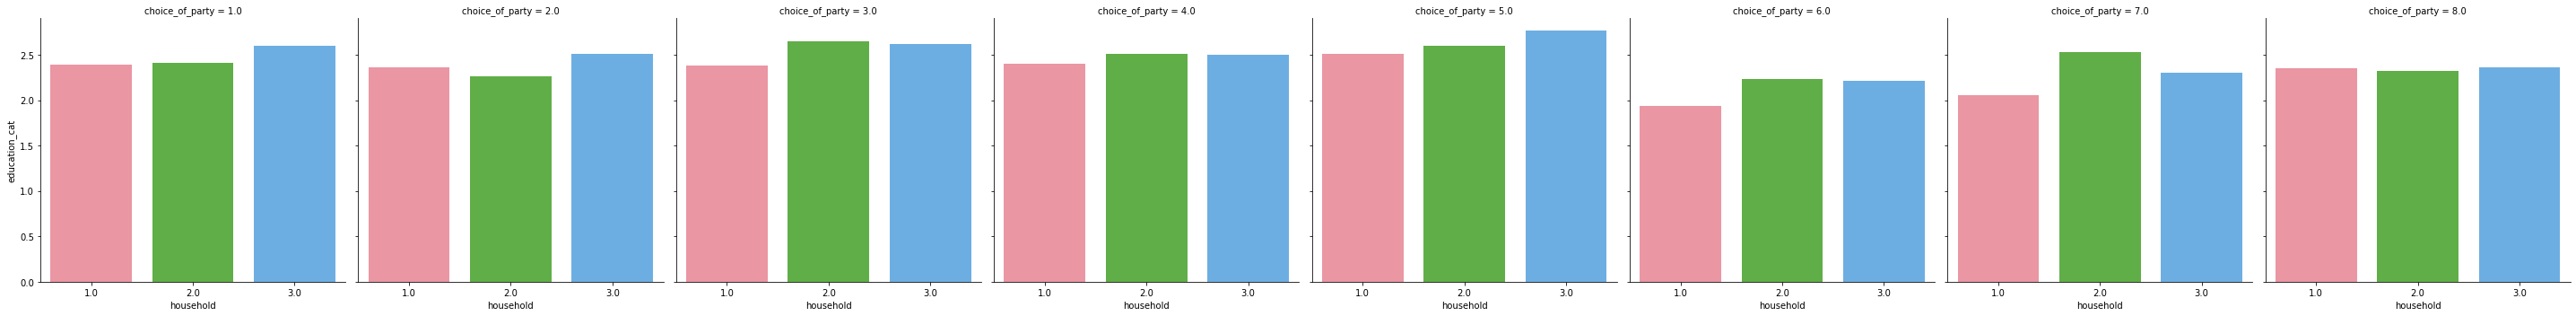

In [58]:
sns.catplot(x='household', y='education_cat', data=data, col='choice_of_party', kind='bar', ci=None)
plt.show()